<a href="https://colab.research.google.com/github/thezachdrake/UMD-INST760-Summer2024/blob/main/Nathaniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

HELLO!

You are helping a propsective student determine which colleges to which they should submit applicaitons. The data below is the results of the 2025 QS University Rankings. More informaiton can be found [here](https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings).

Your student lives in the United States currently. Is there a benefit to moving to a different counrty for school? Do larger schools invest more in reducing their environmental impact? Will their choice of school impact their ability to find a job? Will they be presented with opputunities to learn from other cultures as well as their own?

Your main takeaway should be helping the student assess the differences for them if they chose different types and locations of school. Your main plot might signify a particular school or it might signify a certain size or location of schools. Consider the questions being asked and what might be most useful to this student in making their decision.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [6]:
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


If the student is currently in the United State, they have to firstly consider the top 10 highest ranking school to determine whether they should move to a different location based on the ranking or they should stay in US.

The bar plot represent the top 10 universities in the dataset. According to the diagram, US and UK has the highest ranking.

Let's analyze academic reputation and employment outcome based on the top 10 universities.

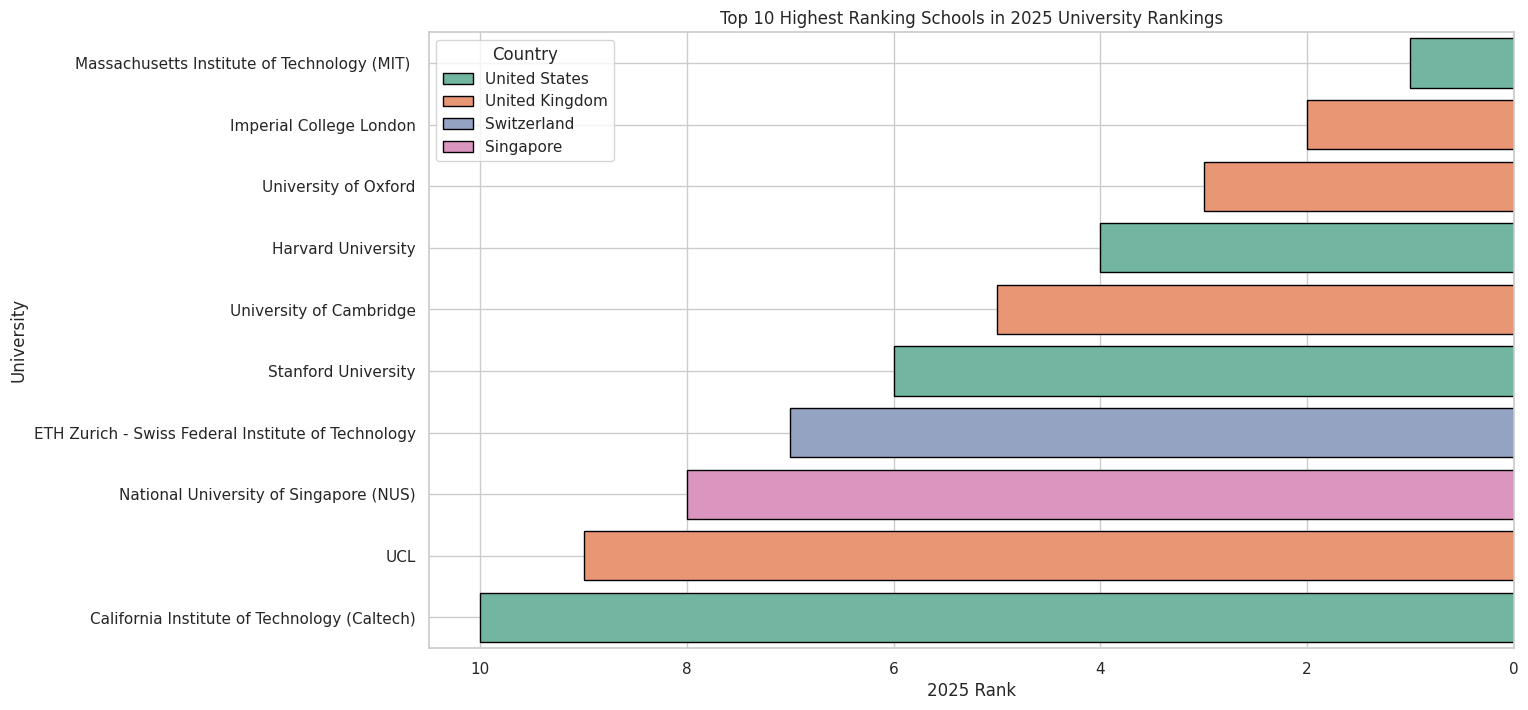

In [69]:
# Sort the dataframe by rank and select the top 10 highest ranking schools
top_schools = df.sort_values(by='2025_rank').head(10)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_schools, x='2025_rank', y='University', hue='Country', palette='Set2', edgecolor = 'black')

plt.title('Top 10 Highest Ranking Schools in 2025 University Rankings')
plt.xlabel('2025 Rank')
plt.ylabel('University')
plt.legend(loc='best', title='Country')
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()

Here is a visual representation that shows the median, quartiles, and potential outliers for the academic reputation scores for each school size category. It reveal schools with higher academic reputation scores and the chance of getting employed in the location.

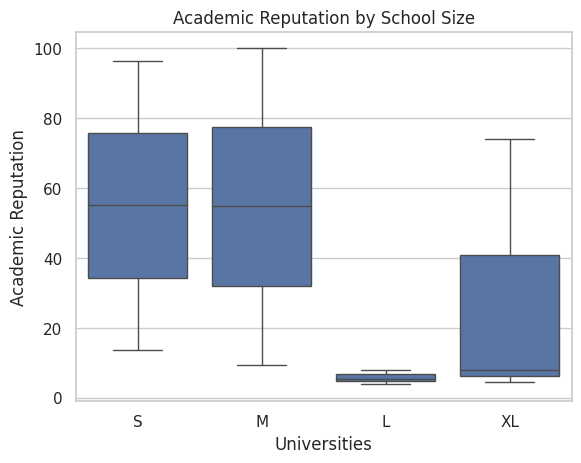

<ipython-input-215-584ff5b58d8b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_schools, x="size",y="employment_outcomes", order= ('S', 'M', 'L', 'XL'), palette='Set3')


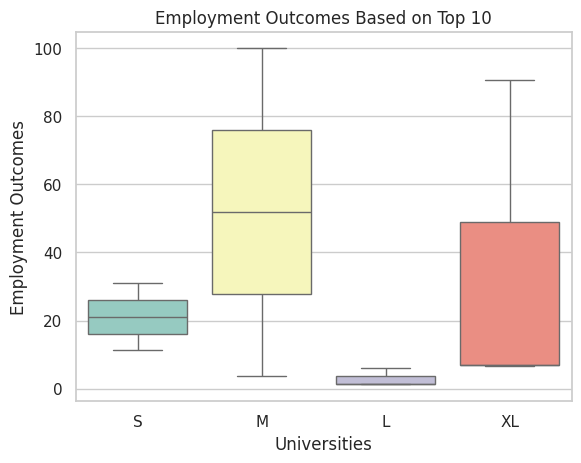

In [215]:
# Boxplot based on Academic Reputation, Employer Reputation
sns.boxplot(data=top_schools, x="size",y="academic_reputation", order= ('S', 'M', 'L', 'XL'))
plt.title('Academic Reputation by School Size')
plt.xlabel("Universities")
plt.ylabel("Academic Reputation")
plt.show()

# Boxplot of 10 Top Schools Based Employment Outcome
# top_schools = df.sort_values(by='2025_rank').head(10)
sns.boxplot(data=top_schools, x="size",y="employment_outcomes", order= ('S', 'M', 'L', 'XL'), palette='Set3')
plt.title('Employment Outcomes Based on Top 10')
plt.xlabel("Universities")
plt.ylabel("Employment Outcomes")
plt.show()

This is a visual representation of employer's reputation and employment outcome based the university ranks. This help to determine what location has the highest job opportunities with excellent employer reputation.

What are the benefits of moving to a different counrty for school?

Consider the academic, employer, and employment's reputation score. Also, determine the location and institution name. If the student move to another country based on the academic score will they be able to find a sustainable job that will cover their daily expense?

In [31]:
highest_rank = df.head(25)

# Use Plotly Express for interactive hover data
fig = px.scatter(highest_rank,
                 x='employer_reputation',
                 y='employment_outcomes',
                 color='institution_name',
                 hover_data=['institution_name'],
                 title='Relationship between Employer Reputation and Employment Outcomes',
                 labels={'employer_reputation': 'Employer Reputation', 'employment_outcomes': 'Employment Outcomes', 'institution_name' : 'Institution Name'},
                 )
fig.show()

Comparing the four top countries

Let determine the maximum employment, qs overall score together with highest percentage of international faculty, and students are in the top university countries.

From the representation University of Oxford has the overall better rate in school considering its sustainability score.


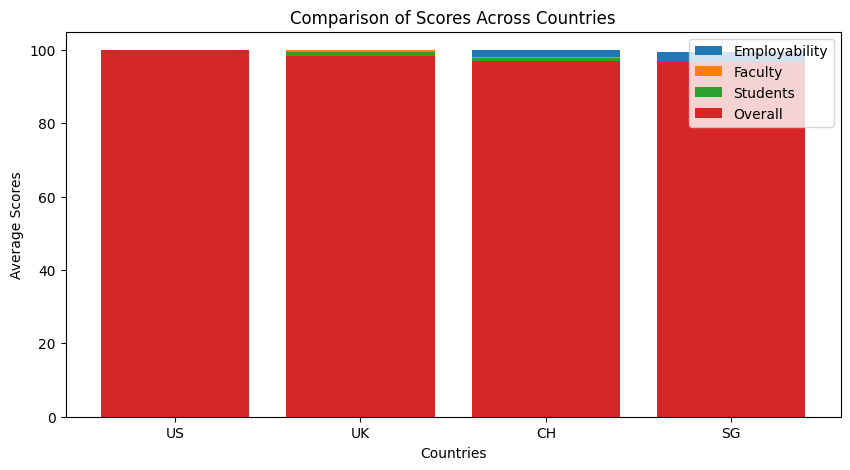

Display the highest ranking:

Institution Name: University of Oxford
Maximum International Faculty: 100.0
Maximum International Students: 100.0
Highest QS Overall Score: 98.5
Highest Employment Outcome: 100.0
Highest Sustainability: 99.7
Highest Rank Score: 9


In [68]:
countries = ['US', 'UK', 'CH', 'SG']

employment_outcomes = [100, 97.4, 100, 99.6]
international_faculty = [99.3, 100, 98.1, 74.1]
international_students = [86.8, 99.6, 97.7, 69]
qs_overall_score = [100, 98.5, 96.9, 96.8]


plt.figure(figsize=(10, 5))
plt.bar(countries, employment_outcomes, label='Employability')
plt.bar(countries, international_faculty, label='Faculty')
plt.bar(countries, international_students, label='Students')
plt.bar(countries, qs_overall_score, label='Overall')


plt.xlabel('Countries')
plt.ylabel('Average Scores')
plt.title('Comparison of Scores Across Countries')
plt.legend()

plt.show()


max_institute = df['institution_name'].max()
max_international_faculty = df['international_faculty'].max()
max_international_students = df['international_students'].max()
max_qs_overall_score = df['qs_overall_score'].max()
max_employment_outcome = df['employment_outcomes'].max()
max_sustainability = df['sustainability'].max()
rank_score = df['2025_rank'].max()

print("Display the highest ranking:\n")
print(f"Institution Name: {max_institute}")
print(f"Maximum International Faculty: {max_international_faculty}")
print(f"Maximum International Students: {max_international_students}")
print(f"Highest QS Overall Score: {max_qs_overall_score}")
print(f"Highest Employment Outcome: {max_employment_outcome}")
print(f"Highest Sustainability: {max_sustainability}")
print(f"Highest Rank Score: {rank_score}")


This dispay the highest institute in 2025 ranking.

<ipython-input-64-bd61120e3a61>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Figure size 1000x600 with 0 Axes>

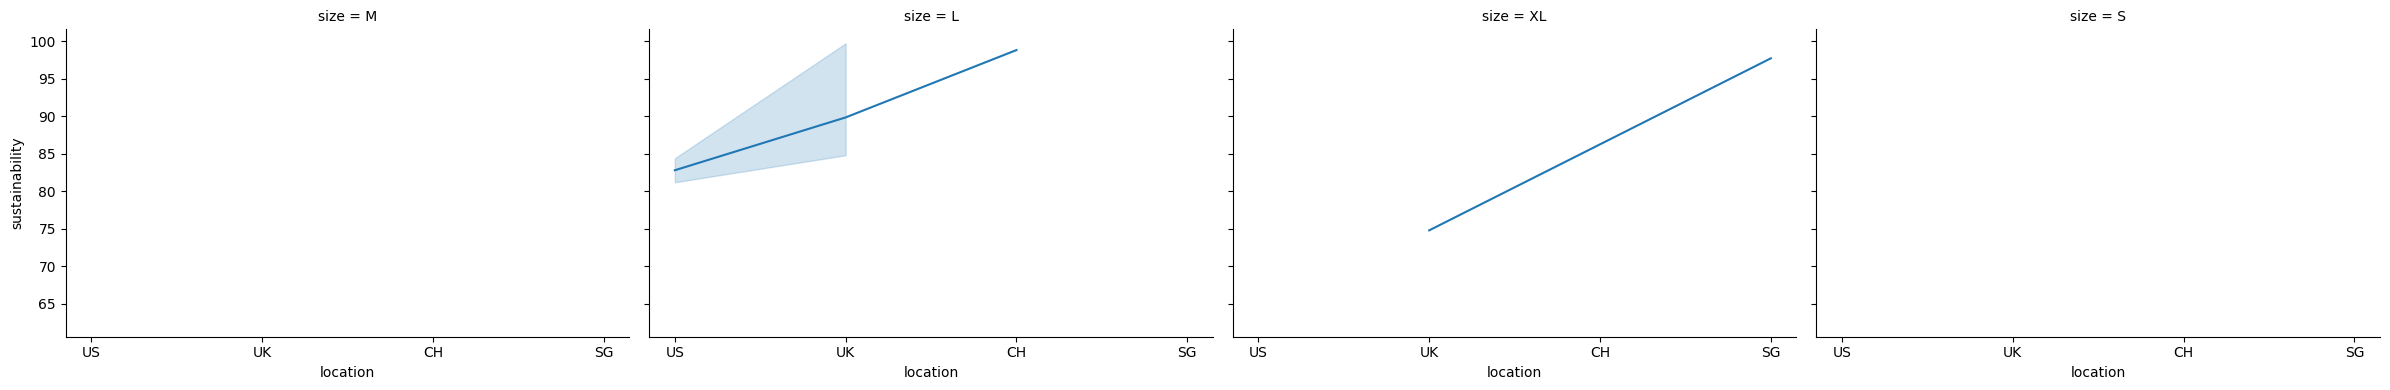

<Figure size 640x480 with 0 Axes>

In [64]:
plt.figure(figsize=(10, 6))
sns.relplot(data=df,
         y='sustainability',
         x='location', col='size',
         kind='line',
         palette='Set2',
         height=4, aspect=1.5
         )
plt.show()
plt.clf()

<Axes: xlabel='2025_rank', ylabel='academic_reputation'>

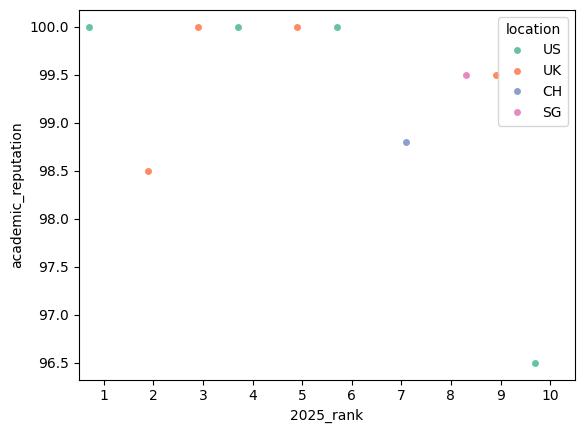

In [17]:
sns.stripplot(data=df,
         x='2025_rank',
         y='academic_reputation',
         hue='location',
         palette='Set2',
         dodge=True,
         jitter=True)

After considering the top 10 Universities, let's filter for only USA. We need to determine if moving to another country is benefical or the student should stay in their home land and avoid expensive relocation.

The table filters institutions only in the United States.

In [271]:
loction_in_us = df[df['location'] == 'US']

loction_in_us


,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score,American,European,Asian,Singaporean
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100,True,False,False,False
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8,True,False,False,False
5,6,5,Stanford University,US,United States,L,100.0,100.0,100.0,99.0,70.3,60.8,96.8,100.0,81.2,96.1,True,False,False,False
9,10,15,California Institute of Technology (Caltech),US,United States,S,96.5,95.3,100.0,100.0,100.0,79.8,65.5,31.0,62.5,90.9,True,False,False,False
10,11,12,University of Pennsylvania,US,United States,L,96.3,91.9,99.8,74.0,90.9,66.2,91.9,100.0,93.0,90.3,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,1401+,1201-1400,Indiana State University,US,United States,M,6.2,4.4,8.5,3.0,1.7,2.2,4.2,6.8,1.0,-,True,False,False,False
1424,1401+,1201-1400,Nova Southeastern University,US,United States,L,2.7,3.5,11.6,2.8,4.7,3.9,13.2,8.9,1.2,-,True,False,False,False
1494,1401+,1201-1400,University of Central Oklahoma,US,United States,L,5.6,2.9,6.5,1.5,15.9,9.9,5.2,2.9,1.0,-,True,False,False,False
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-,True,False,False,False


Showing the academic reputation, and employment outcomes in USA

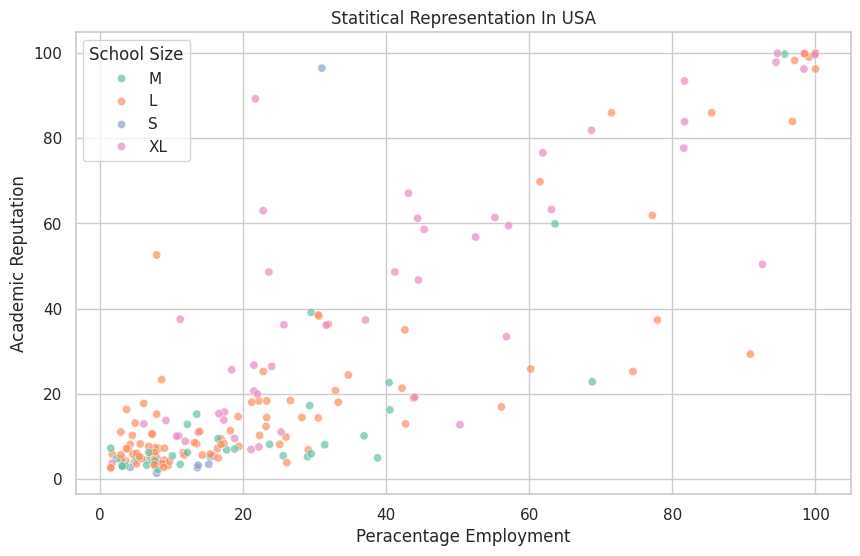

In [307]:
loction_in_us = df[df['location'] == 'US']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loction_in_us, x='employment_outcomes', y='academic_reputation', hue='size', palette='Set2', alpha=0.7)
plt.xlabel('Peracentage Employment')
plt.ylabel('Academic Reputation')
plt.title('Statitical Representation In USA')
plt.legend(title='School Size')
plt.show()


Displaying the visual representation of top ranking universities in USA.

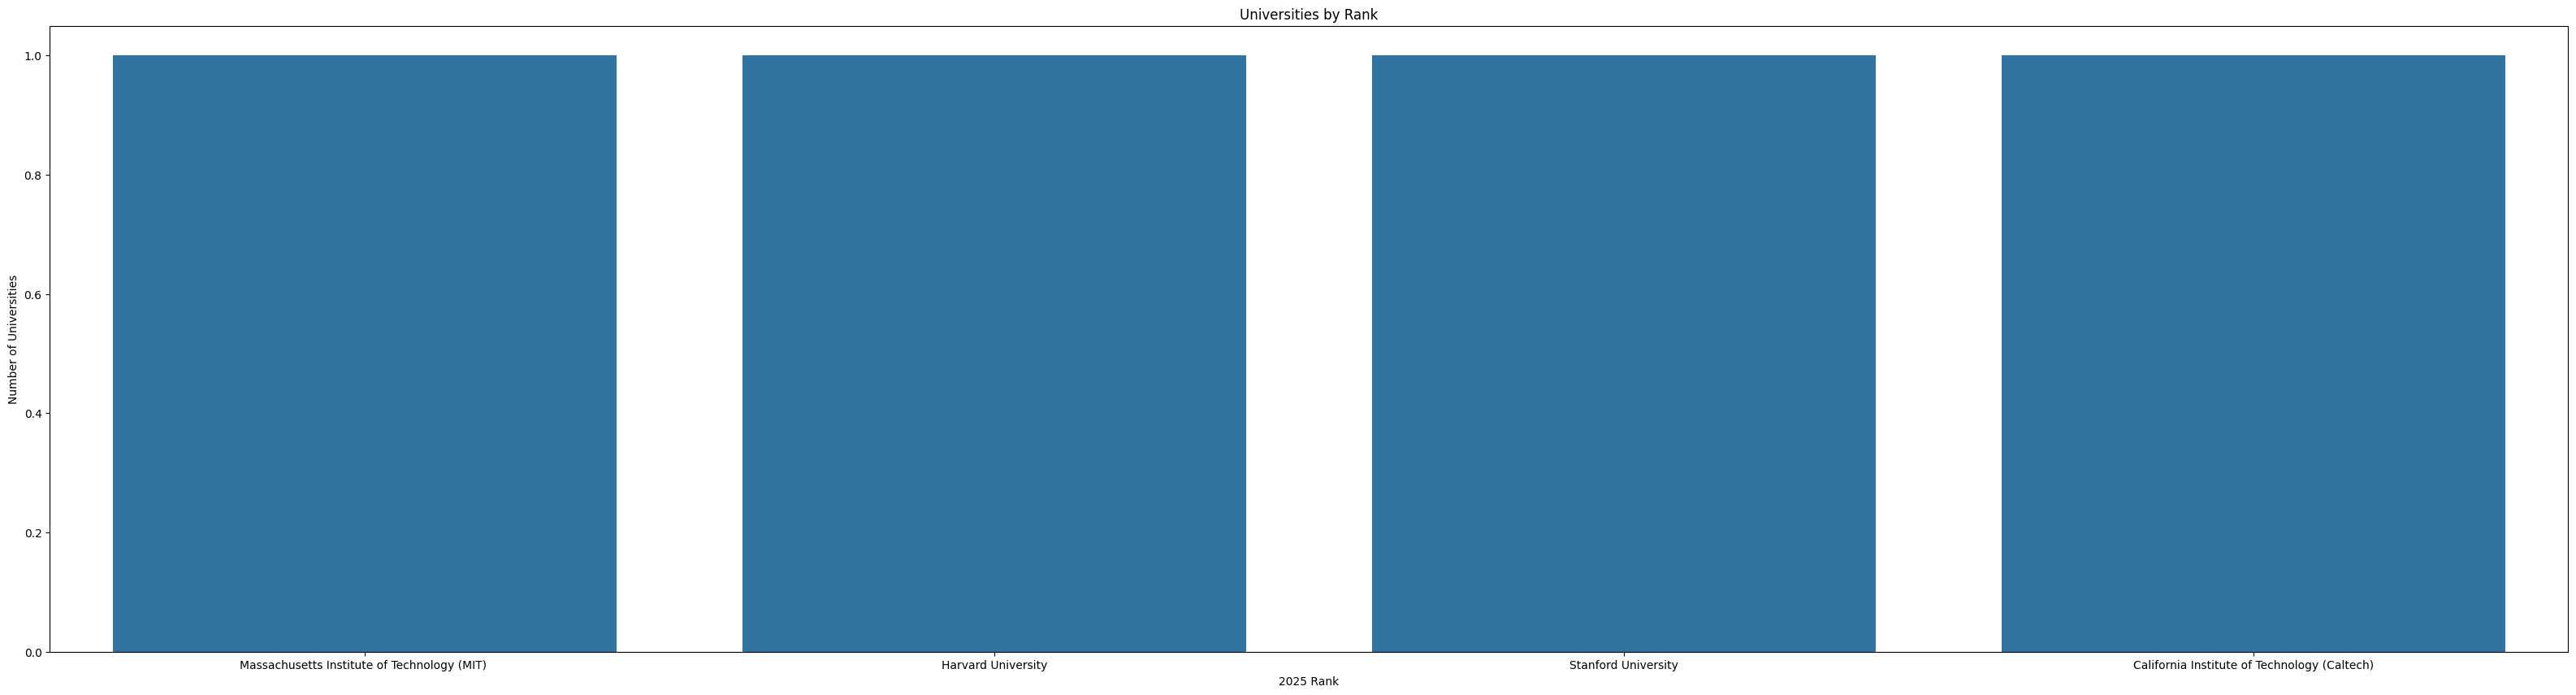

In [54]:
loction_in_us = df[df['location'] == 'US'].head(5)
plt.figure(figsize=(40, 10))
sns.countplot(data=loction_in_us, x='institution_name')
plt.title('Universities by Rank')
plt.xlabel('2025 Rank')
plt.ylabel('Number of Universities')
plt.show()

Top ranked school in USA based on its academic repuation.

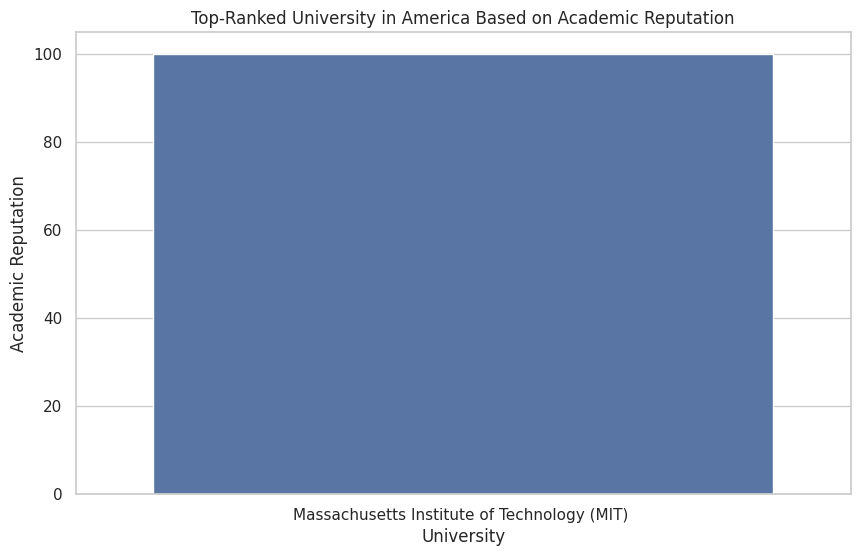

In [250]:
top_rank_usa = df[df['location'] == 'US']

# Identify the top-ranked universities based on 'Academic Reputation'
top_ranked = top_rank_usa.sort_values(by='academic_reputation', ascending=False).head(1)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_ranked, x='institution_name', y='academic_reputation')

# Customize the plot
plt.title('Top-Ranked University in America Based on Academic Reputation')
plt.xlabel('University')
plt.ylabel('Academic Reputation')

# Show the plot
plt.show()

Maximum score from the highest ranking schools in USA.

In [67]:
max_institute = loction_in_us['institution_name'].max()
max_academic_reputation = loction_in_us['academic_reputation'].max()
max_international_faculty = loction_in_us['international_faculty'].max()
max_international_students = loction_in_us['international_students'].max()
max_qs_overall_score = loction_in_us['qs_overall_score'].max()
max_employment_outcome = loction_in_us['employment_outcomes'].max()
max_sustainability = loction_in_us['sustainability'].max()
rank_score = loction_in_us['2025_rank'].max()

print("Display the highest ranking:\n")
print(f"Institution Name: {max_institute}")
print(f"The maximum value of academic reputation in the US is: {max_academic_reputation}")
print(f"Maximum International Faculty: {max_international_faculty}")
print(f"Maximum International Students: {max_international_students}")
print(f"Highest QS Overall Score: {max_qs_overall_score}")
print(f"Highest Employment Outcome: {max_employment_outcome}")
print(f"Highest Sustainability: {max_sustainability}")
print(f"Highest Rank Score: {rank_score}")



Display the highest ranking:

Institution Name: Stanford University
The maximum value of academic reputation in the US is: 100.0
Maximum International Faculty: 100.0
Maximum International Students: 86.8
Highest QS Overall Score: 96.8
Highest Employment Outcome: 100.0
Highest Sustainability: 99.0
Highest Rank Score: 6


Main takeaway:

After analyzing the top school with the highest job outcome, academic reputation, 2025 ranking and sustainability, UK has the highest representation however they have the average school rankings. If a student want to consider the 2025 institution ranking, USA has the highest ranks.

Comparing the top schools in US and UK:
. UK has 97.4 average score of international students, 86% average of employment opportunity, and 87.3 average sustainability
. US has 85.2 average score of international students, and 66% average of employment opportunity, and 73.5 average sustainability

Based on the statistical fact, moving to another country is beneficial because the student be presented with opputunities to learn from other cultures as well as their own, able to find a job and have sustainable lifestyle.
